##### 확률경사하강법

In [10]:
import numpy as np
np.random.seed(42)
X = np.linspace(-np.pi,np.pi,100)
y = np.sin(X) # + np.random.randn(100)
# np.linspace ^ 정해진 구간을 균등하게 나눈 값들을 생성하는 NumPy 메소드

In [11]:
X[1] - X[0], X[2] -X[1], np.random.randn(100) # 노이즈 추가

(np.float64(0.06346651825433947),
 np.float64(0.06346651825433902),
 array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
        -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
        -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
         1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
         0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
        -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
         0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
         0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
         0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
        -0.47917424, -0.18565898, -1.10633497, -1.196206

In [33]:
# 가중치 초기값
a,b,c,d  = 0.,0.,0.,0.
eta = 1e-3 # learning rate 0.001
           # 이 수치가 적당하게 설정해주는 게 좋다.
           # 보편적으로 learing rate는 1e-3으로 한다.
           # 너무 수치가 크면 오차가 늘어나고, 너무 수치가 작으면 과적합의 위험이 있다.
epochs = 5000 

# 하이퍼 파리미터 지정? ^

###### 모델의 출력(예측) : y_hat = ax**3 + bx**2 +bx + d
###### 오차 : e = y - y_hat
###### 손실함수
###### 전체 손실량 L 을 구하는 수식 mse(L) =  1/n*sum((y - y_hat)**2)
```
직접적으로 a의 변화량과 L의 변화량은 연관이 없다.
그걸 오차 e를 통해 연쇄법칙으로 계산한다. ^
```

![화면 캡처 2025-10-30 092157.png](<attachment:화면 캡처 2025-10-30 092157.png>)
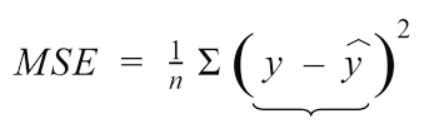

In [34]:
# 학습과정 기록 : 손실값, 파라미터의 값 기록
mse_history = np.zeros(epochs) # epoch 갯수만큼의 틀 생성
parameter_history = np.zeros((epochs,4))

- 기울기 DL / Delta(seta - a,b,c,d 중에 하나) 손실 L이 y_hat을 통해 seta에 의존 연쇄법칙이 가능
```
    델타 : 변화량
    세타 : 모델의 파라미터, 계수
```
- 편미분 a로 편미분 x**3
- 편미분 b로 편미분 x**2
- 편미분 c로 편미분 x
- 편미분 d로 편미분 1

- 기울기 a 2(y-y_hat)*x**3
- 기울기 b 2(y-y_hat)*x**2
- 기울기 c 2(y-y_hat)*x
- 기울기 d 2(y-y_hat)*1

In [35]:
for epoch in range(epochs):
    y_hat = a*X**3 + b*X**2 + c*X + d
    e = y - y_hat

    # mse
    mse = np.mean(e**2)
    mse_history[epoch] = mse

    # gradient
    da = np.mean(-e*X**3)
    db = np.mean(-e*X**2)
    dc = np.mean(-e*X)
    dd = np.mean(-e*1)
    # - 를 붙인 이유 ^

    # update
    a -= eta*2*da
    b -= eta*2*db
    c -= eta*2*dc
    d -= eta*2*dd
    # 빼기로 갱신하는 이유 ^

    parameter_history[epoch] = [a,b,c,d]

# 최종결과
print(a,b,c,d,mse)

-0.09165604777707692 2.0108726069584627e-17 0.8478358282593335 -5.54225094912501e-17 0.0047661861965792056


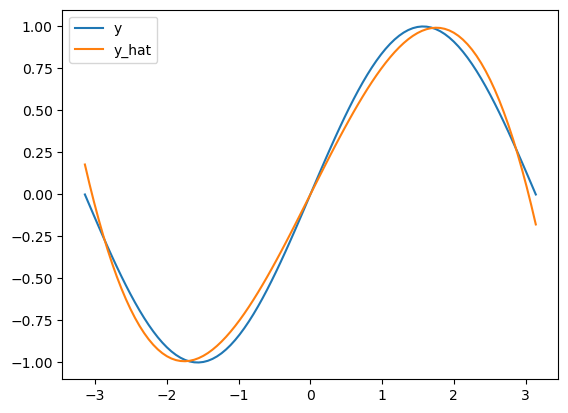

In [36]:
# 시각화
import matplotlib.pyplot as plt
plt.plot(X,y,label='y')
plt.plot(X,y_hat, label='y_hat')
plt.legend()
plt.show()

In [37]:
# 텐서로 변경 - 자동 미분
import torch
import numpy as np
torch.manual_seed(42)
np.random.seed(42)